<a href="https://colab.research.google.com/github/hirajya/CCDATSCL_EXERCISES_COM222/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

<img src="https://vsqfvsosprmjdktwilrj.supabase.co/storage/v1/object/public/images/insights/1753644539114-netflix.jpeg"/>


In this activity , you will explore two fundamental preprocessing techniques used in data science and machine learning: feature scaling and discretization (binning).

These techniques are essential when working with datasets that contain numerical values on very different scales, or continuous variables that may be more useful when grouped into categories.


We will use a subset of the Netflix Movies and TV Shows dataset, which contains metadata such as release year, duration, ratings, and other attributes of titles currently or previously available on Netflix. Although the dataset is not originally designed for numerical modeling, it contains several features suitable for preprocessing practice—such as:
- Release Year
- Duration (in minutes)
- Genre

In this worksheet, you will:
- Load and inspect the dataset
- Select numerical features for scaling
- Apply different scaling techniques
- Min–Max Scaling
- Standardization
- Robust Scaling
- Perform discretization (binning)
- Equal-width binning
- Equal-frequency binning
- Evaluate how scaling affects machine learning performance, using a simple KNN

In [635]:
import pandas as pd
import os
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub


## 1. Setup and Data Loading



Load the Netflix dataset into a DataFrame named df.

In [636]:

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)


if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'netflix-shows' dataset.
Path to dataset files: /kaggle/input/netflix-shows
True


## 2. Data Understanding

Store the dataset’s column names in a variable called cols.

In [637]:
cols = df.columns

In [638]:
cols

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Store the shape of the dataset as a tuple (rows, columns) in shape_info.

In [639]:
shape_info = df.shape

In [640]:
shape_info

(8807, 12)

## 3. Data Cleaning
Count missing values per column and save to missing_counts.

In [641]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Drop rows where duration is missing. Save to df_clean.

In [642]:
print(f"BEFORE Shape Info:{shape_info}")
df_clean = df.dropna(subset=['duration'])


BEFORE Shape Info:(8807, 12)


In [643]:
shape_info = df_clean.shape
print(f"AFTER Shape Info:{shape_info}")


AFTER Shape Info:(8804, 12)


## 4. Selecting Relevant Numeric Features

Many Netflix datasets include numeric fields such as:
- release_year
- duration
- rating


Create a DataFrame `df_num` containing only numeric columns.

In [644]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      6170 non-null   object
 4   cast          7979 non-null   object
 5   country       7973 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.2+ KB


In [645]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [646]:
df_num = df_clean.select_dtypes(include='number')

In [647]:
print(df_num.columns)

Index(['release_year'], dtype='object')


## 5. Feature Scaling

Focus on a single numeric column (e.g., duration).


Extract the column duration into a Series named `dur`.

In [648]:
df_clean['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [649]:
# flagged df column with Season|Seasons
df_clean['is_season'] = df_clean['duration'].str.contains(r'Season|Seasons', case=False, na=False)

print("DataFrame with 'is_season' flag (from original 'df'):")
display(df_clean[['duration', 'is_season']].head())

print("\nValue counts for 'is_season' flag:")
display(df_clean['is_season'].value_counts())

DataFrame with 'is_season' flag (from original 'df'):


/tmp/ipython-input-3987835075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['is_season'] = df_clean['duration'].str.contains(r'Season|Seasons', case=False, na=False)


,duration,is_season
0,90 min,False
1,2 Seasons,True
2,1 Season,True
3,1 Season,True
4,2 Seasons,True



Value counts for 'is_season' flag:


,count
is_season,
False,6128
True,2676


Note that for the subsequent steps, we will continue to use `df_clean`, which has already had the rows containing 'Season' or 'Seasons' removed from its 'duration' column to allow for numerical operations.

In [650]:
print(df_clean.shape)

(8804, 13)


In [651]:
# assuming 12 episodes per season and 45 minutes per episodes

import re

EPISODES_PER_SEASON = 12
MIN_PER_EPISODE = 45
MIN_PER_SEASON = EPISODES_PER_SEASON * MIN_PER_EPISODE   # 540

def convert_duration_to_minutes(df):
    def convert(value, is_season):
        if is_season:
            num = int(re.findall(r'\d+', value)[0])
            return num * MIN_PER_SEASON

        else:
            return int(re.findall(r'\d+', value)[0])

    df['dur'] = df.apply(
        lambda row: convert(row['duration'], row['is_season']),
        axis=1
    )

    return df

In [652]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,is_season
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",False
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",True
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,True
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",True
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,True


In [653]:
df_clean = convert_duration_to_minutes(df_clean)

/tmp/ipython-input-4258917366.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dur'] = df.apply(


In [654]:
df_clean

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,is_season,dur
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",False,90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",True,1080
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,True,540
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",True,540
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,True,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",False,158
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",True,1080
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,False,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",False,88


Apply Min–Max Scaling to `dur`. Store the result as `dur_minmax`.

In [655]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dur_minmax = scaler.fit_transform(df_clean[['dur']])
df_clean['dur_minmax'] = dur_minmax

df_clean.head()

/tmp/ipython-input-3000929239.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['dur_minmax'] = dur_minmax


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,is_season,dur,dur_minmax
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",False,90,0.009480
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",True,1080,0.117359
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,True,540,0.058516
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",True,540,0.058516
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,True,1080,0.117359


Apply Z-score Standardization to `dur`. Store in `dur_zscore`.

In [656]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dur_zscore = scaler.fit_transform(df_clean[['dur']])
df_clean['dur_zscore'] = dur_zscore

df_clean.head()

/tmp/ipython-input-1578741264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['dur_zscore'] = dur_zscore


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,is_season,dur,dur_minmax,dur_zscore
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",False,90,0.009480,-0.438326
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",True,1080,0.117359,1.174849
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,True,540,0.058516,0.294935
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",True,540,0.058516,0.294935
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,True,1080,0.117359,1.174849


## 6. Discretization (Binning)
Apply equal-width binning to dur into 5 bins. Store as `dur_width_bins`.


- Use `pandas.cut()` to divide duration_minutes into 4 `equal-width bins`.
- Add the resulting bins as a new column named:
`duration_equal_width_bin`

In [657]:
import matplotlib.pyplot as plt
import seaborn as sns

In [658]:
# --- Equal-Width binning into 4 bins ---
df_clean['duration_equal_width_bin'] = pd.cut(df_clean['dur_minmax'], bins=4)

print("First 5 rows with 'dur' and 'duration_equal_width_bin':")
display(df_clean[['dur', 'duration_equal_width_bin']].head())

print("\nValue counts for Equal-Width Bins:")
width_counts = df_clean['duration_equal_width_bin'].value_counts().sort_index()
display(width_counts)

/tmp/ipython-input-2992415945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['duration_equal_width_bin'] = pd.cut(df_clean['dur_minmax'], bins=4)


First 5 rows with 'dur' and 'duration_equal_width_bin':


,dur,duration_equal_width_bin
0,90,"(-0.001, 0.25]"
1,1080,"(-0.001, 0.25]"
2,540,"(-0.001, 0.25]"
3,540,"(-0.001, 0.25]"
4,1080,"(-0.001, 0.25]"



Value counts for Equal-Width Bins:


,count
duration_equal_width_bin,
"(-0.001, 0.25]",8640
"(0.25, 0.5]",138
"(0.5, 0.75]",20
"(0.75, 1.0]",6


Describe the characteristics of each bin

- What are the bin edges produced by equal-width binning?
- How many movies fall into each bin?

/tmp/ipython-input-1020614548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


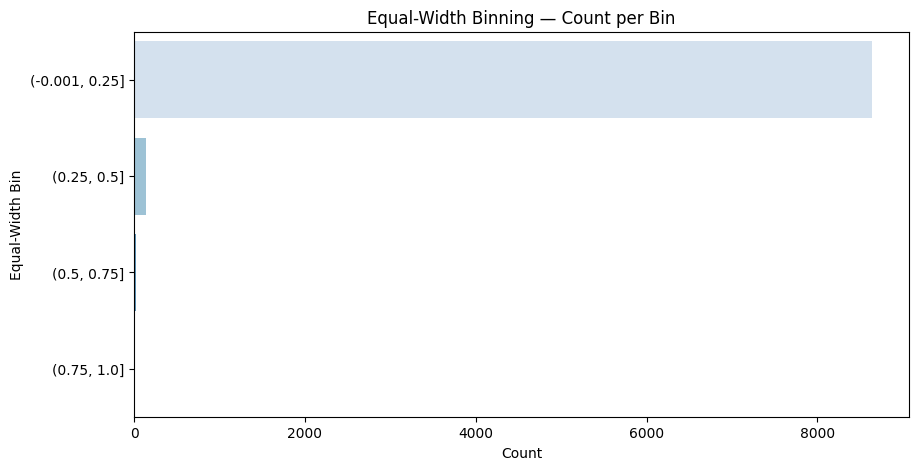

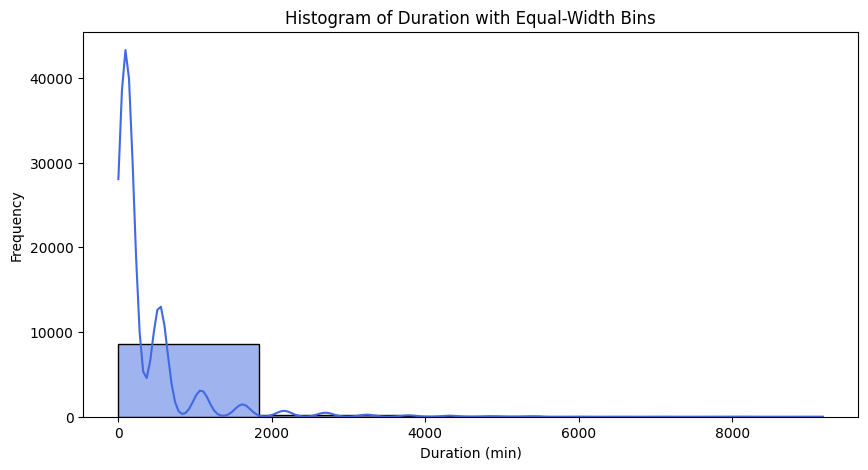

In [659]:
# Countplot of equal-width bins
plt.figure(figsize=(10, 5))
sns.countplot(
    y=df_clean['duration_equal_width_bin'],
    order=width_counts.index,
    palette="Blues"
)
plt.title("Equal-Width Binning — Count per Bin")
plt.xlabel("Count")
plt.ylabel("Equal-Width Bin")
plt.show()

# Histogram showing binning
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['dur'], bins=5, kde=True, color="royalblue")
plt.title("Histogram of Duration with Equal-Width Bins")
plt.xlabel("Duration (min)")
plt.ylabel("Frequency")
plt.show()


Apply equal-frequency binning to dur into 5 bins. Store as `dur_quantile_bins`.

- Use `pandas.qcut()` to divide duration_minutes into 4 equal-frequency bins.
- Add the result as a new column named:
`duration_equal_freq_bin`

In [660]:
# --- Equal-Frequency / Quantile binning into 4 bins ---
df_clean['duration_equal_freq_bin'] = pd.qcut(df_clean['dur'], q=4)

print("First 5 rows with 'dur' and 'duration_equal_freq_bin':")
display(df_clean[['dur', 'duration_equal_freq_bin']].head())

print("\nValue counts for Equal-Frequency Bins:")
freq_counts = df_clean['duration_equal_freq_bin'].value_counts().sort_index()
display(freq_counts)

First 5 rows with 'dur' and 'duration_equal_freq_bin':


/tmp/ipython-input-3777995209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['duration_equal_freq_bin'] = pd.qcut(df_clean['dur'], q=4)


,dur,duration_equal_freq_bin
0,90,"(2.999, 92.0]"
1,1080,"(540.0, 9180.0]"
2,540,"(112.0, 540.0]"
3,540,"(112.0, 540.0]"
4,1080,"(540.0, 9180.0]"



Value counts for Equal-Frequency Bins:


,count
duration_equal_freq_bin,
"(2.999, 92.0]",2263
"(92.0, 112.0]",2212
"(112.0, 540.0]",3446
"(540.0, 9180.0]",883


Describe the characteristics of each bin

- What are the bin ranges produced by equal-frequency binning?
- How many movies fall into each bin? Are they nearly equal?

/tmp/ipython-input-4057505830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


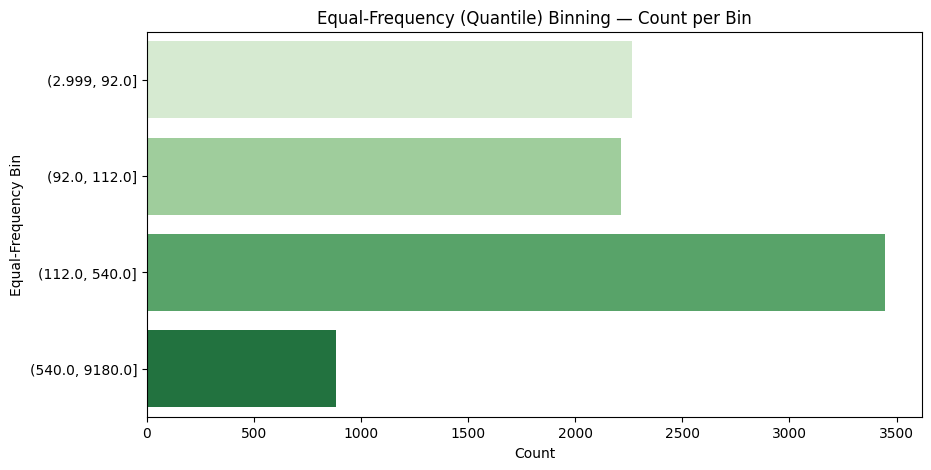

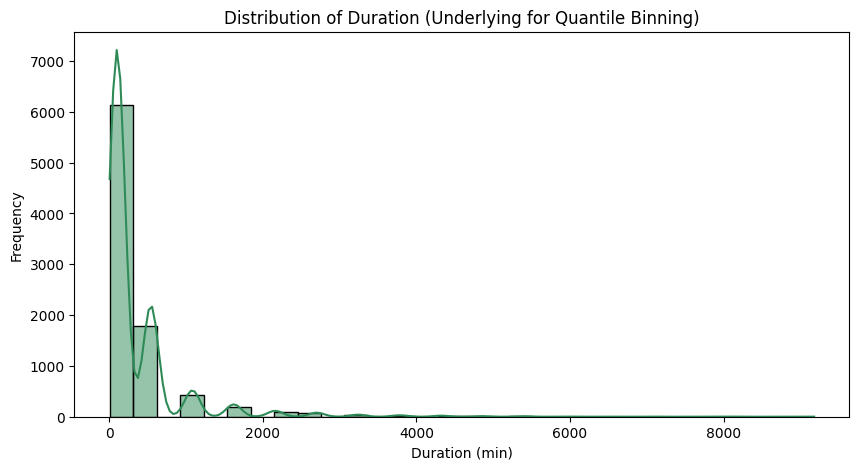

In [661]:
plt.figure(figsize=(10, 5))
sns.countplot(
    y=df_clean['duration_equal_freq_bin'],
    order=freq_counts.index,
    palette="Greens"
)
plt.title("Equal-Frequency (Quantile) Binning — Count per Bin")
plt.xlabel("Count")
plt.ylabel("Equal-Frequency Bin")
plt.show()

# Underlying distribution histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['dur'], bins=30, kde=True, color="seagreen")
plt.title("Distribution of Duration (Underlying for Quantile Binning)")
plt.xlabel("Duration (min)")
plt.ylabel("Frequency")
plt.show()


## 7. KNN Before & After Scaling


Create a feature matrix X using any two numeric columns and a target y (e.g.,

1.   List item
2.   List item

classification by genre or type). Create a train/test split.

Train a KNN classifier without scaling. Store accuracy in acc_raw.

Scale `X` using either Min–Max or Standardization, retrain KNN, and store accuracy in acc_scaled.

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'is_season', 'dur', 'dur_minmax', 'dur_zscore',
       'duration_equal_width_bin', 'duration_equal_freq_bin'],
      dtype='object')

Did scaling improve accuracy? Explain why.

In [664]:
# put your answer here